# ¿Como tratar variables categoricas?
__*Sergio Camposortega*__


## Variables Categóricas, Cualitativas o de Atributo

Las variables Categóricas se asignan a un grupo en particular sobre la base de algunas caracteristicas cualitativas.

Los valores de una variante categórica se pueden colocar en un número contable de categorías o grupos diferentes. 

In [2]:
import pandas as pd
import numpy as np
from numpy import ndarray

from sklearn import preprocessing

df = pd.read_csv('clase_vc.csv')
del df['Unnamed: 0']

In [3]:
social = ['A' ,'B','C+','C','D+']
df['nivel_SE'] = np.random.choice(social, size=df.shape[0])

In [4]:
df[['id_plan_tarifario', 'nivel_SE']].head()

,id_plan_tarifario,nivel_SE
0,KM,D+
1,KM,B
2,MT,A
3,KM,C
4,KM,C+


Las variables categóricas pueden ser:

    Nominales: Los datos no cuentan con un orden.
    Ordinales: Los valores pueden ser ordenados lógicamente.

En el caso de variables cualitativas o categóricas nominales, el análisis consiste simplemente en determinar el rango de valores y frecuencia de cada valor. 

Una técnica útil es la tabulación de frecuencias junto a porcentaje de ocurrencias de cada categoría.

In [9]:
df.id_plan_tarifario.value_counts(normalize=True)

MT     0.311573
E1     0.221452
KM     0.181411
F1     0.153266
GF     0.078508
GW     0.039677
GH     0.012621
DH     0.000806
KEL    0.000403
DU     0.000161
KH     0.000081
LG     0.000040
Name: id_plan_tarifario, dtype: float64

In [5]:
relfreq = pd.crosstab(index=df.id_plan_tarifario, columns='frecuencia')
relfreq['porcentaje'] = relfreq/relfreq.sum()
relfreq

col_0,frecuencia,porcentaje
id_plan_tarifario,,
DH,20,0.000806
DU,4,0.000161
E1,5492,0.221452
F1,3801,0.153266
GF,1947,0.078508
GH,313,0.012621
GW,984,0.039677
KEL,10,0.000403
KH,2,0.000081


Una variable categorica que solo toma dos valores se le conoce como variable binaria o dicotómica y las variables categoricas que toman diversas clases se denominan variables politómica.

Ejemplos de variables categoricas:
  <ul style="list-style-type:circle">
      <li>Genero</li>
      <li>cimei (cambio imei)</li>
      <li>Nivel Socioeconómico</li>
      <li>Plan Tarifario</li>
      <li>Acepto Campaña</li>
  </ul>

Preprocesaremos los datos categoricos en la siguiente base de datos con las variables de CHURN que corresponde a la campaña realizada de MovistarOn.

One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.

Let’s take the following example. I have seven sample inputs of categorical data belonging to four categories. Now, I could encode these to nominal values as I have done here, but that wouldn’t make sense from a machine learning perspective. We can’t say that the category of “Penguin” is greater or smaller than “Human”. Then they would be ordinal values, not nominal.

What we do instead is generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample. Hence, the term one hot encoding.

This works very well with most machine learning algorithms. Some algorithms, like random forests, handle categorical values natively. Then, one hot encoding is not necessary. The process of one hot encoding may seem tedious, but fortunately, most modern machine learning libraries can take care of it.

__One hot encoding__ transforma una variable a un formato que trabaja mejor con algoritmos de clasificación y de regresión.

En algunos casos, si nosotros pasamos una variable como valor nominal (sin orden) desde la perspectiva de ML no tiene sentido ya que no podriamos decir si una categoria es mayor o menor comparandose entre ellos. Por ejemplo, rango de edades (0-10,11-20,21-30,31-40,40+), estos valores se tienen que tomar como valores categoricos ordinales (sistematicos).

Lo que necesitariamos generar es una columna booleana para cada categoria, las famosas dummies.

Esto mejora en la mayoria de los algoritmos de ML, como veremos a continuacion.

In [6]:
pd.DataFrame(df.dtypes, columns=['Tipo'])

,Tipo
dn,int64
nir,int64
id_plan_tarifario,object
cimei,object
total_recargado,int64
num_recargas,int64
total_sms,int64
voz_totales,int64
minutos_totales,float64
contact_totales,int64


One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.

Let’s take the following example. I have seven sample inputs of categorical data belonging to four categories. Now, I could encode these to nominal values as I have done here, but that wouldn’t make sense from a machine learning perspective. We can’t say that the category of “Penguin” is greater or smaller than “Human”. Then they would be ordinal values, not nominal.

What we do instead is generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample. Hence, the term one hot encoding.

This works very well with most machine learning algorithms. Some algorithms, like random forests, handle categorical values natively. Then, one hot encoding is not necessary. The process of one hot encoding may seem tedious, but fortunately, most modern machine learning libraries can take care of it.

Es importante identificar las variables como estan declaradas ya que al momento de modelar es común tomar un tipo de valor incorrecto como en el caso de las siguientes variables:

<ul style="list-style-type:circle">
      <li>id_plan_tarifario</li>
      <li>cimei</li>
      <li>nivel_SE</li>
      <li>nir</li>
</ul>

Por lo que es necesario un preprocesamiento de variables.

Aqui mencionaremos algunas para el preprocesamiento:

## Creación de variables categóricas



### Scikit_learn LabelEncoder

En python, la libreria de sklearn requiere variables numéricas, por lo que es necesario procesar datos categoricos.

A continuación, mostraremos el preprocesamiento con scikit_learn.preprocessing.LabelEncoder
el cual transforma de strings a valores enteros, identificando clases en la columna seleccionada y asignandole un valor numérico.

Esta forma de procesar es adecuada para variables ordinales, donde el orden *si* importa ya que el algoritmo de ML notara las diferencias entre la clase 9 y la calse 1 teniendo en cuenta que 9 > 1.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24800 entries, 0 to 24799
Data columns (total 13 columns):
dn                   24800 non-null int64
nir                  24800 non-null int64
id_plan_tarifario    24800 non-null object
cimei                24800 non-null object
total_recargado      24800 non-null int64
num_recargas         24800 non-null int64
total_sms            24800 non-null int64
voz_totales          24800 non-null int64
minutos_totales      24800 non-null float64
contact_totales      24800 non-null int64
mbtotal              24800 non-null float64
movion               24800 non-null int64
nivel_SE             24800 non-null object
dtypes: float64(2), int64(8), object(3)
memory usage: 2.5+ MB


In [12]:
df_scikit = df

In [13]:
df_scikit.head()

,dn,nir,id_plan_tarifario,cimei,total_recargado,num_recargas,total_sms,voz_totales,minutos_totales,contact_totales,mbtotal,movion,nivel_SE
0,2224659298,222,KM,No,128,3,0,40,16.000000,11,583.664024,1,D+
1,2291876892,229,KM,No,275,6,79,177,626.400000,36,4924.583176,1,B
2,2711230123,271,MT,No,100,1,48,192,821.283333,49,1868.924695,1,A
3,3317976724,331,KM,No,50,2,10,36,80.283333,13,41.898383,1,C
4,4441482671,444,KM,No,150,1,70,107,103.800000,24,1848.759486,1,C+


In [8]:
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()

print('tipo de la columna:',type(df_scikit.nivel_SE[0]))
#Aqui el modelo ajusta las etiquetas a los valores numericos
le.fit(df_scikit.nivel_SE)

print('categorias', le.classes_)

print('Transformación de valores a numérico mostrando los elementos:',
      le.transform(df_scikit.nivel_SE)[:11])
print('Transformación inversa de valores numéricos a strings mostrando elementos:',
      le.inverse_transform(le.transform(df_scikit.nivel_SE)[:5]))
#Para agregarlas al DataFrame solo reemplazas la columna con el siguiente comando 
# df_scikit.plan_tarif = le.transform(df_scikit.plan_tarif)

tipo de la columna: <type 'str'>
categorias ['A' 'B' 'C' 'C+' 'D+']
Transformación de valores a numérico mostrando los elementos: [3 0 0 2 2 2 1 2 0 3 1]
Transformación inversa de valores numéricos a strings mostrando elementos: ['C+' 'A' 'A' 'C' 'C']


### Scikit-Learn LabelBinarizer

Consiste en un clasificador binario de clases

Regresara una clasificacion binaria por clase, por lo que convertira etiquetas multiclase a etiquetas binarias

In [9]:
df_scikit.id_plan_tarifario.head(10)

0    KM
1    KM
2    MT
3    KM
4    KM
5    KM
6    KM
7    MT
8    KM
9    KM
Name: id_plan_tarifario, dtype: object

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

print('tipo de la columna:',type(df_scikit.id_plan_tarifario[0]))
#Aqui el modelo ajusta las etiquetas a los valores numericos
lb.fit(df_scikit.id_plan_tarifario)

print('categorias', lb.classes_)

print('transformacion de valores a numerico mostrando los primeros 5 elementos:',
      lb.transform(df_scikit.id_plan_tarifario)[:5])

tipo de la columna: <type 'str'>
categorias ['DH' 'DU' 'E1' 'F1' 'GF' 'GH' 'GW' 'KEL' 'KH' 'KM' 'LG' 'MT']
transformacion de valores a numerico mostrando los primeros 5 elementos: [[0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]]


### Pandas

Se puede crear de Series o de una categoria del DataFrame ejemplo:

In [16]:
df.id_plan_tarifario.unique()

array(['KM', 'MT', 'E1', 'GF', 'F1', 'GW', 'GH', 'DH', 'DU', 'KEL', 'KH',
       'LG'], dtype=object)

In [17]:
df.head()

,dn,nir,id_plan_tarifario,cimei,total_recargado,num_recargas,total_sms,voz_totales,minutos_totales,contact_totales,mbtotal,movion,nivel_SE
0,2224659298,222,KM,No,128,3,0,40,16.000000,11,583.664024,1,D+
1,2291876892,229,KM,No,275,6,79,177,626.400000,36,4924.583176,1,B
2,2711230123,271,MT,No,100,1,48,192,821.283333,49,1868.924695,1,A
3,3317976724,331,KM,No,50,2,10,36,80.283333,13,41.898383,1,C
4,4441482671,444,KM,No,150,1,70,107,103.800000,24,1848.759486,1,C+


In [11]:
pd.get_dummies(df.id_plan_tarifario)

,DH,DU,E1,F1,GF,GH,GW,KEL,KH,KM,LG,MT
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
df_dummi = pd.concat([df, pd.get_dummies(df.id_plan_tarifario)], axis=1)
df_dummi.head()

,dn,nir,id_plan_tarifario,cimei,total_recargado,num_recargas,total_sms,voz_totales,minutos_totales,contact_totales,...,E1,F1,GF,GH,GW,KEL,KH,KM,LG,MT
0,2224659298,222,KM,No,128,3,0,40,16.000000,11,...,0,0,0,0,0,0,0,1,0,0
1,2291876892,229,KM,No,275,6,79,177,626.400000,36,...,0,0,0,0,0,0,0,1,0,0
2,2711230123,271,MT,No,100,1,48,192,821.283333,49,...,0,0,0,0,0,0,0,0,0,1
3,3317976724,331,KM,No,50,2,10,36,80.283333,13,...,0,0,0,0,0,0,0,1,0,0
4,4441482671,444,KM,No,150,1,70,107,103.800000,24,...,0,0,0,0,0,0,0,1,0,0


Otra manera para su procesamiento es pasar de String a categorica, por medio de pandas, con el comando astype('category')

In [19]:
df['plan_tarif'] = df["id_plan_tarifario"].astype('category')

In [20]:
df.plan_tarif.head()

0    KM
1    KM
2    MT
3    KM
4    KM
Name: plan_tarif, dtype: category
Categories (12, object): [DH, DU, E1, F1, ..., KH, KM, LG, MT]

No olvidar como tratar los valores nulos ya sea rellenando las variables por el valor más probable o eliminando el registro

Otras formas de tratar las variables categoricas es convertir rangos numericos a clases numericas (rango de edades) y existen diversos métodos como:

La creación de una nueva variable basandose en la moda o promedio del rango

Crear dos variables tomando en cuenta el valor menor del rango y el mayor

<img src='https://www.analyticsvidhya.com/wp-content/uploads/2015/11/Bins2-850x221.png'>

De esta manera nos dara mayor información.

Las diferencias con R factor:

    Los niveles en R son llamadas categorias en pandas.
    Los R niveles son siempre de tipo string, mientras que en pandas pueden ser de cualquier tipo.
    Es imposible especificar etiquetas al momento de su creacion, se utiliza el comando s.cat.rename_categories(new_labels) para renombrar en Python
    R permite incluir valores nulos en sus niveles (categorias en pandas). Pandas no permite NaN como categoria, sin embargo, permite valores nulos.

In [15]:
df_scikit

,dn,nir,id_plan_tarifario,cimei,total_recargado,num_recargas,total_sms,voz_totales,minutos_totales,contact_totales,mbtotal,movion,nivel_SE,plan_tarif
0,2224659298,222,KM,No,128,3,0,40,16.000000,11,583.664024,1,C+,KM
1,2291876892,229,KM,No,275,6,79,177,626.400000,36,4924.583176,1,A,KM
2,2711230123,271,MT,No,100,1,48,192,821.283333,49,1868.924695,1,A,MT
3,3317976724,331,KM,No,50,2,10,36,80.283333,13,41.898383,1,C,KM
4,4441482671,444,KM,No,150,1,70,107,103.800000,24,1848.759486,1,C,KM
5,4492313656,449,KM,No,239,5,8,44,73.616667,22,2482.158710,1,C,KM
6,5570778791,557,KM,No,100,1,43,96,185.300000,36,346.337603,1,B,KM
7,5577385228,557,MT,No,30,1,2,15,21.583333,4,29.732287,1,C,MT
8,7352143556,735,KM,No,230,2,247,166,235.100000,43,2369.176522,1,A,KM
9,8261274728,826,KM,No,449,4,4,72,103.550000,19,7340.303943,1,C+,KM


Pandas tiene una documentacion bastante completa para la obtencion y preprocesamiento de variables categoricas
Mayor info en: https://pandas.pydata.org/pandas-docs/stable/categorical.html

In [16]:
del  df_dummi['KH']
del df_dummi['KM']

#no olvidar quitar variables directamente relacionadas con la 'y' del predict del modelo

## Modelado
Ejemplo de predicciones con base de datos de movion

In [17]:
df_model = df[['dn', 'nir','movion', 'id_plan_tarifario', 'cimei','nivel_SE','total_recargado',
 'num_recargas','total_sms', 'voz_totales',
 'minutos_totales', 'contact_totales', 'mbtotal']]

In [18]:
from __future__ import division
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

col_names = df_model.columns.tolist()

print ("Nombres de Columnas:")
print( col_names)

df_model.head(6)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Nombres de Columnas:
['dn', 'nir', 'movion', 'id_plan_tarifario', 'cimei', 'nivel_SE', 'total_recargado', 'num_recargas', 'total_sms', 'voz_totales', 'minutos_totales', 'contact_totales', 'mbtotal']


,dn,nir,movion,id_plan_tarifario,cimei,nivel_SE,total_recargado,num_recargas,total_sms,voz_totales,minutos_totales,contact_totales,mbtotal
0,2224659298,222,1,KM,No,C+,128,3,0,40,16.000000,11,583.664024
1,2291876892,229,1,KM,No,A,275,6,79,177,626.400000,36,4924.583176
2,2711230123,271,1,MT,No,A,100,1,48,192,821.283333,49,1868.924695
3,3317976724,331,1,KM,No,C,50,2,10,36,80.283333,13,41.898383
4,4441482671,444,1,KM,No,C,150,1,70,107,103.800000,24,1848.759486
5,4492313656,449,1,KM,No,C,239,5,8,44,73.616667,22,2482.158710


In [19]:
y = df_model['movion']

print (u"Acepto Campaña: ", sum(y))
print (u"No movion Campaña: ", y.shape[0] - sum(y))
print (u"Número de Registros", y.count())

Acepto Campaña:  7400
No movion Campaña:  17400
Número de Registros 24800


In [20]:
features = df_model[['nir','id_plan_tarifario', 'total_recargado',
 'num_recargas','total_sms', 'voz_totales',
 'minutos_totales', 'contact_totales',  'mbtotal']]

X = features.as_matrix().astype(np.float)

ValueError: could not convert string to float: E1

In [ ]:
features

In [21]:
features.id_plan_tarifario
le =  LabelEncoder()
#Aqui el modelo ajusta las etiquetas a los valores numericos
le.fit(features.id_plan_tarifario)
#LABELENCODER
features.id_plan_tarifario = le.transform(features.id_plan_tarifario)

#le.fit(features.nivel_SE)
#features.nivel_SE = le.transform(features.nivel_SE)

#LABELBINARIZER
#lb =  LabelBinarizer()
#lb.fit(features.cimei)
#features.cimei = lb.transform(features.cimei)

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


PARA EL ALGORITMO DE ML NO TIENE SENTIDO YA QUE LE ESTOY DANDO UNA VARIABLE CATEGORICA ORDENADA, CUANDO NO LO ES, LOA ADECUADO ES PASARLA A DUMMIES

In [22]:
X = features.as_matrix().astype(np.float)

Score medio Accuracy: 0.792419354839
Score medio AUC: 0.752388975017


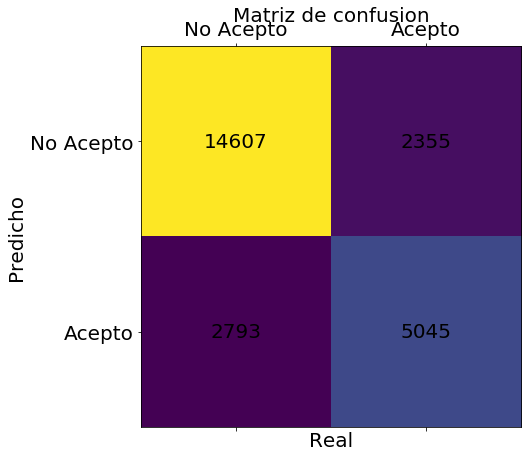

             precision    recall  f1-score   support

          0       0.86      0.84      0.85     17400
          1       0.64      0.68      0.66      7400

avg / total       0.80      0.79      0.79     24800



In [23]:
kf=cross_validation.KFold(n=y.shape[0], n_folds=5, shuffle=True, random_state=0)

acc = np.zeros((5,))
auc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of 
#each of the folds
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = tree.DecisionTreeClassifier(criterion='gini')
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    auc[i] = metrics.roc_auc_score(yhat[test_index], y_test)
    i=i+1
print ('Score medio Accuracy: '+ str(np.mean(acc)))
print ('Score medio AUC: '+ str(np.mean(auc)))


cm = metrics.confusion_matrix(y, yhat)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)
plt.title('Matriz de confusion',size=20)
ax.set_xticklabels([''] + ['No Acepto', 'Acepto'], size=20)
ax.set_yticklabels([''] + ['No Acepto', 'Acepto'], size=20)
plt.ylabel('Predicho',size=20)
plt.xlabel('Real',size=20)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[i,j], va='center', ha='center',color='black',size=20)
fig.set_size_inches(7,7)
plt.show()

print (metrics.classification_report(y,yhat))

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

fi_1 = pd.DataFrame(index=features.columns, data=dt.feature_importances_, columns=['Importancia'])
df_fi_1 = fi_1.reset_index()
df_fi_1 = df_fi_1.sort_values('Importancia', ascending=False).head(20)

data_bar_1 = [
    go.Bar(
        x=df_fi_1['index'],
        y=df_fi_1['Importancia']
    )
]
layout =  go.Layout(
    title='Variables Importantes')
fig = go.Figure(data=data_bar_1, layout=layout)
    
py.iplot(fig, filename='pandas-bar-chart')

cambiando por dummies

In [27]:
features_dummi = df_dummi[['nir','total_recargado',
 'num_recargas','total_sms', 'voz_totales',
 'minutos_totales', 'contact_totales',  'mbtotal',
 'DH', 'DU', 'E1', 'F1', 'GF', 'GH', 'GW', 'KEL', 'LG', 'MT']]

features_dummi = pd.concat([features_dummi, pd.get_dummies(features_dummi.nir)], axis=1)

X = features_dummi.drop(['nir'], axis=1).as_matrix().astype(np.float)

Score medio Accuracy: 0.804717741935
Score medio AUC: 0.766932371121


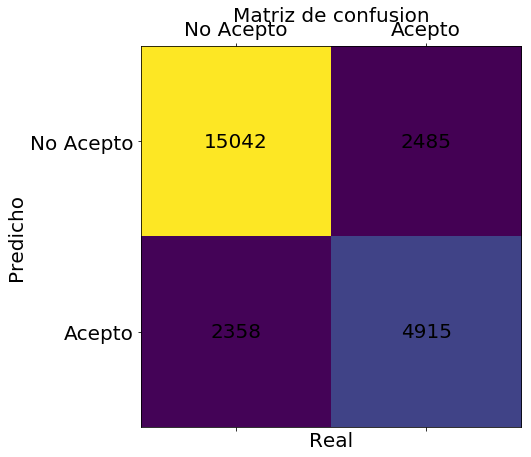

             precision    recall  f1-score   support

          0       0.86      0.86      0.86     17400
          1       0.68      0.66      0.67      7400

avg / total       0.80      0.80      0.80     24800



In [28]:
kf=cross_validation.KFold(n=y.shape[0], n_folds=5, shuffle=True, random_state=0)

acc = np.zeros((5,))
auc = np.zeros((5,))
i=0
#We will build the predicted y from the partial predictions on the test of 
#each of the folds
yhat = y.copy()
for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    dt = tree.DecisionTreeClassifier(criterion='gini')
    dt.fit(X_train,y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = dt.predict(X_test)
    acc[i] = metrics.accuracy_score(yhat[test_index], y_test)
    auc[i] = metrics.roc_auc_score(yhat[test_index], y_test)
    i=i+1
print ('Score medio Accuracy: '+ str(np.mean(acc)))
print ('Score medio AUC: '+ str(np.mean(auc)))

cm = metrics.confusion_matrix(y, yhat)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(cm)
plt.title('Matriz de confusion',size=20)
ax.set_xticklabels([''] + ['No Acepto', 'Acepto'], size=20)
ax.set_yticklabels([''] + ['No Acepto', 'Acepto'], size=20)
plt.ylabel('Predicho',size=20)
plt.xlabel('Real',size=20)
for i in range(2):
    for j in range(2):
        ax.text(i, j, cm[i,j], va='center', ha='center',color='black',size=20)
fig.set_size_inches(7,7)
plt.show()

print (metrics.classification_report(y,yhat))

In [29]:
fi = pd.DataFrame(index=features_dummi.drop('nir',axis=1).columns, data=dt.feature_importances_, columns=['Importancia'])

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

df_fi = fi.reset_index()
df_fi = df_fi.sort_values('Importancia', ascending=False).head(20)

data_bar = [
    go.Bar(
        x=df_fi['index'],
        y=df_fi['Importancia']
    )
]
layout =  go.Layout(
    title='Variables Importantes')
fig = go.Figure(data=data_bar, layout=layout)
    
py.iplot(fig, filename='pandas-bar-chart')

In [31]:
with open("tree_classifier.txt", "w") as f:
    f = tree.export_graphviz(dt, out_file=f)